# 对图像做Canny 边缘检测后保存

In [5]:
import cv2

img_path = 'maopi.jpeg'

# 读取图片
image = cv2.imread(img_path)

# 使用Canny边缘检测
edges = cv2.Canny(image, threshold1=30, threshold2=100)

# 保存图像
cv2.imwrite('edges.jpg', edges)

True

# 处理前后对比

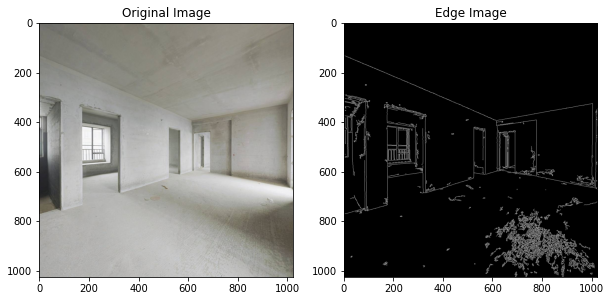

In [6]:
import matplotlib.pyplot as plt

# 读取原图
original = cv2.imread(img_path, cv2.IMREAD_COLOR)

# 读取处理后的图像
edges = cv2.imread('edges.jpg', cv2.IMREAD_COLOR)

# OpenCV使用BGR模式，而matplotlib使用RGB模式，所以我们需要转换颜色模式
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
edges = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

# 创建子图来展示对比
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 展示原图
axs[0].imshow(original, cmap='gray')
axs[0].set_title('Original Image')

# 展示处理后的图像
axs[1].imshow(edges, cmap='gray')
axs[1].set_title('Edge Image')

# 显示图像
plt.show()

# Prompt

In [3]:
# 请为我的别墅装修，淡蓝色的海洋风格，墙壁上画满了栩栩如生的海洋生物！

# 环境配置

In [7]:
!pip3 install openmim
!mim install 'mmcv>=2.0.0'
!mim install 'mmengine'

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 51 kB 2.0 MB/s  eta 0:00:01
     |████████████████████████████████| 239 kB 70.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 61.6 MB/s eta 0:00:01
     |████████████████████████████████| 84 kB 43.8 MB/s eta 0:00:01
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.10.0
    Uninstalling Pygments-2.10.0:
      Successfully uninstalled Pygments-2.10.0
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.10.0/index.html
     |████████████████████████████████| 86.2 MB 167 kB/s eta 0:00:011   |██                              | 5.5 MB 1.2 MB/s eta 0:01:09     |██▊                             | 7.2 MB 1.2 MB/s eta 0:01:07     |███▋                            | 9.7 MB 1.2 MB/s eta 0:01:05     |███▉                            | 10.4 MB 1.2 MB/s eta 0:01:05     |█████▋     

In [8]:
!git clone https://github.com/open-mmlab/mmagic.git
%cd mmagic
!pip3 install -e .

正克隆到 'mmagic'...
remote: Enumerating objects: 25636, done.
remote: Counting objects: 100% (3600/3600), done.
remote: Compressing objects: 100% (1572/1572), done.
remote: Total 25636 (delta 2011), reused 3200 (delta 1975), pack-reused 22036
接收对象中: 100% (25636/25636), 21.60 MiB | 13.13 MiB/s, 完成.
处理 delta 中: 100% (17169/17169), 完成.
/home/featurize/mmagic
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Obtaining file:///home/featurize/mmagic
     |████████████████████████████████| 30.7 MB 74.1 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 72.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 75.6 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 27.2 MB/s eta 0:00:01
     |████████████████████████████████| 59 kB 47.7 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 65.8 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 39.9 MB/s eta 0:00:01
     |████████████████████████████████| 33.0 MB 67.9 MB/s eta 0

In [9]:
!pip install opencv-python pillow matplotlib seaborn tqdm -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip install clip transformers gradio 'httpx[socks]' diffusers==0.14.0 -i https://pypi.tuna.tsinghua.edu.cn/simple
!mim install 'mmdet>=3.0.0'

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 293 kB 53.8 MB/s eta 0:00:01
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 20.0 MB 75.0 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 60.6 MB/s eta 0:00:01
     |████████████████████████████████| 737 kB 76.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 71.2 MB/s eta 0:00:01
     |████████████████████████████████| 136 kB 80.8 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 64.5 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 47.5 MB/s eta 0:00:01
     |████████████████████████████████| 45 kB 36.8 MB/s eta 0:00:01
     |████████████████████████████████| 288 kB 56.6 MB/s eta 0:00:01
     |████████████████████████████████| 471 kB 51.1 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 64.7 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 52.7 MB

# 导入工具包

In [10]:
import cv2
import numpy as np
import mmcv
from mmengine import Config
from PIL import Image

from mmagic.registry import MODELS
from mmagic.utils import register_all_modules

register_all_modules()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

# 载入ControlNet模型

In [11]:
cfg = Config.fromfile('configs/controlnet/controlnet-canny.py')
controlnet = MODELS.build(cfg.model).cuda()

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


06/16 00:50:30 - mmengine - INFO - Set model dtype to 'torch.float32'.


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


06/16 00:50:57 - mmengine - INFO - Creating runwayml/stable-diffusion-v1-5 by 'HuggingFace'


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Do not support Xformers. Please install Xformers first. The program will run without Xformers.


06/16 00:51:10 - mmengine - INFO - Set model dtype to 'torch.float32'.
Do not support Xformers. Please install Xformers first. The program will run without Xformers.


# 输入Canny边缘图

In [13]:
control_img = mmcv.imread('../edges.jpg')
control = cv2.Canny(control_img, 100, 200)
control = control[:, :, None]
control = np.concatenate([control] * 3, axis=2)
control = Image.fromarray(control)

# 咒语Prompt

In [16]:
prompt = 'Room with blue walls and a gray ceiling.'

# 执行预测

In [17]:
output_dict = controlnet.infer(prompt, control=control)
samples = output_dict['samples']
for idx, sample in enumerate(samples):
    sample.save(f'sample_{idx}.png')
controls = output_dict['controls']
for idx, control in enumerate(controls):
    control.save(f'control_{idx}.png')

100%|██████████| 20/20 [00:07<00:00,  2.61it/s]


# 结果展示

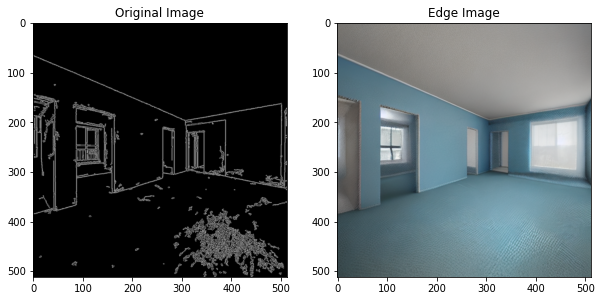

In [18]:
import matplotlib.pyplot as plt
import cv2

# 以彩色模式读取图片
original = cv2.imread('control_0.png', cv2.IMREAD_COLOR)
edges = cv2.imread('sample_0.png', cv2.IMREAD_COLOR)

# OpenCV使用BGR模式，而matplotlib使用RGB模式，所以我们需要转换颜色模式
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
edges = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

# 创建子图来展示对比
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 展示原图
axs[0].imshow(original)
axs[0].set_title('Original Image')

# 展示处理后的图像
axs[1].imshow(edges)
axs[1].set_title('Edge Image')

# 显示图像
plt.show()